# Welcome to the In-Silico Framework (ISF)

ISF is a multi-scale simulation and analysis framework for single cell modeling.

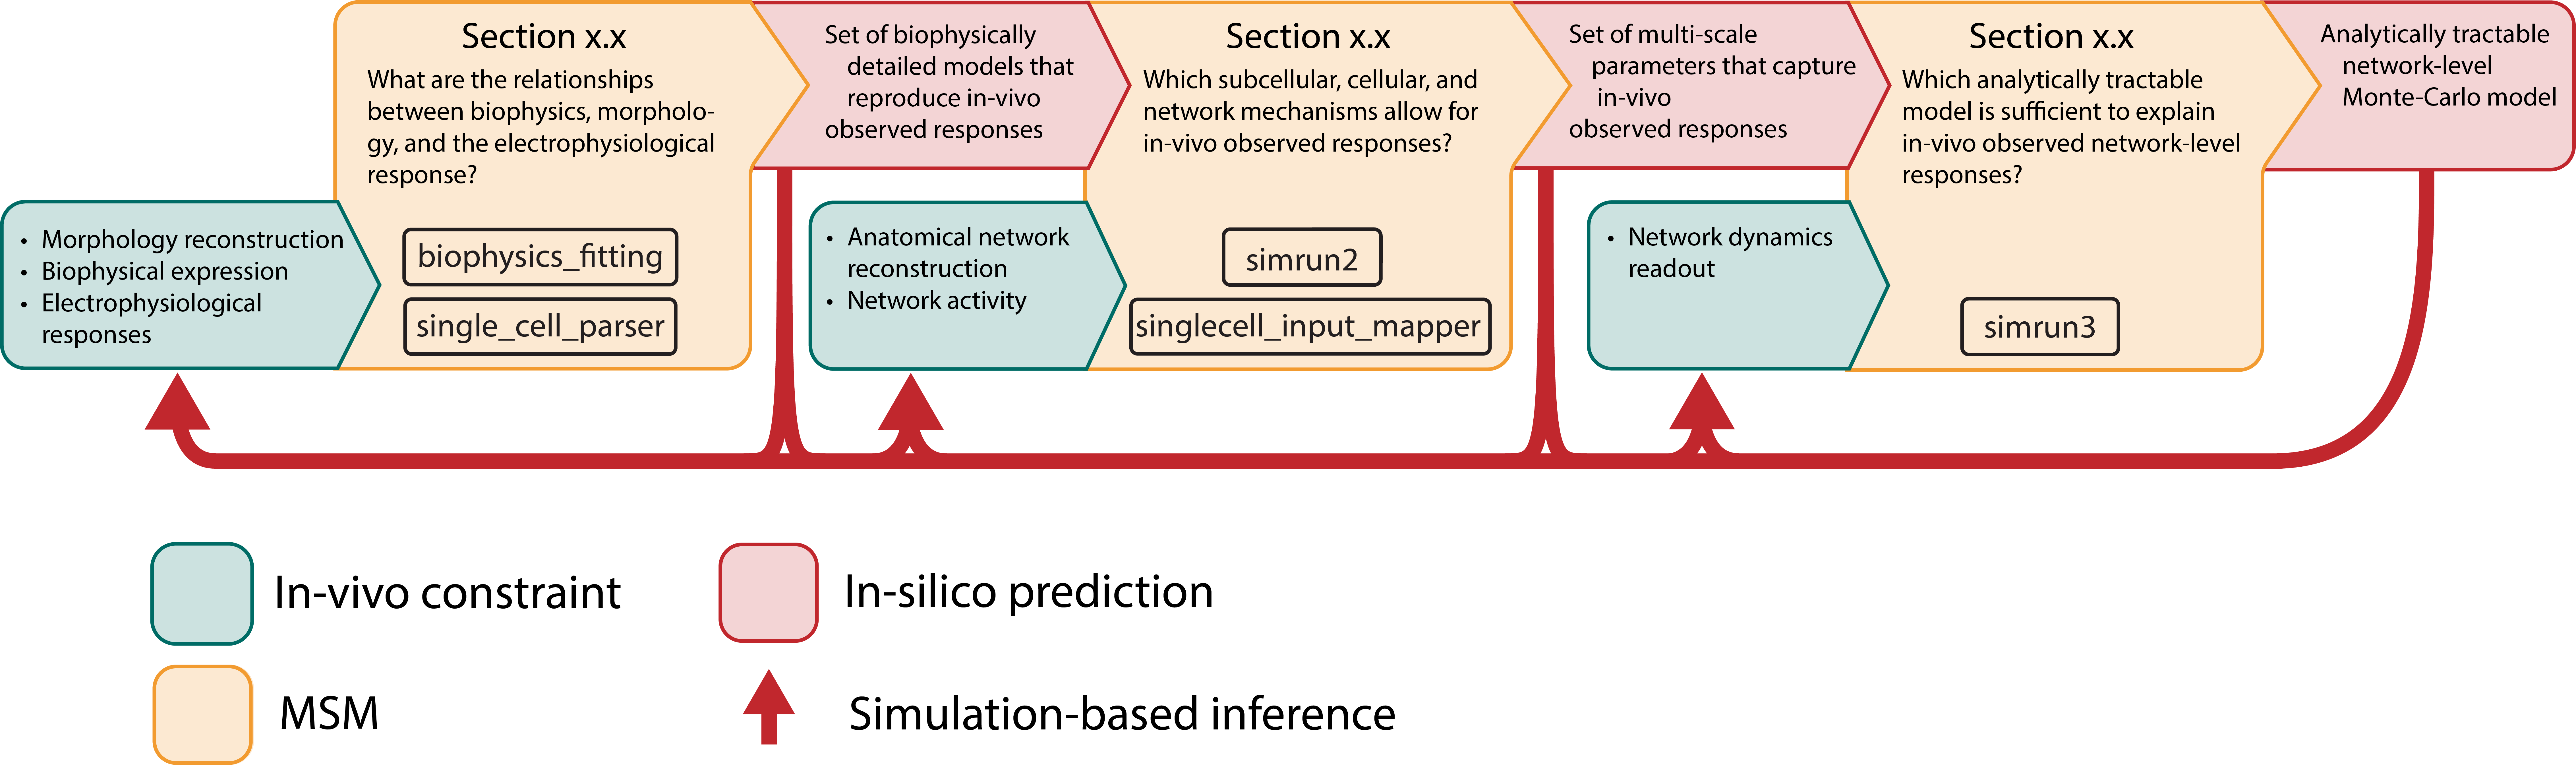

It allows to simulate single cells, while keeping track of the neurobiological implementation across many scales. These scales can always be constrained with empirical data.

# 

## Installation

To install ISF (assuming you have already cloned the repository), navigate to the [installer directory](../install). there, you will find installation guides for the simulation environment NEURON, as well as ISF installation scripts for three Python versions: [py2.7](../installer/py2.7/), [py3.8](../installer/py3.8/) and [py3.9](../installer/py3.9/). Navigate to the folder you would like to install and run the containing installation script as outlined below. This will:
-  install Anaconda
- conda packages
- pip packages
- install/patch pandas-msgpack (only for py3.8 and py3.9)
- patch pandas (only for py2.7)
- install an associated ipykernel
- compile the [NEURON mechanisms](../mechanisms) used in this repo.

```bash
>>> [user@localhost home]  cd in_silico_framework/install/py3.8
>>> [user@localhost py3.8] ./install.sh

Enter the directory in which the Anaconda environment should be installed: some-absolute-path/anaconda_isf3.8

0/6. Preliminary checks ----------------------------------------------------------------------------
Found Anaconda installer in installer/downloads
No conda packages found in downloads/conda_packages. They will be downloaded.
Warning: found PyPI packages in downloads/pip_packages. They will not be redownloaded. If you have changed the pip_requirements.txt file, you should remove this folder or its contents before attemtping a reinstall.

1/6. Installing Anaconda ---------------------------------------------------------------------------

Anaconda will be installed in: some-absolute-path/anaconda_isf3.8
PREFIX=some-absolute-path/anaconda_isf3.8
Unpacking payload ...
Collecting package metadata (current_repodata.json): done                                                                                                                                                                       
Solving environment: done

## Package Plan ##

  environment location: /gpfs/soma_fs/scratch/meulemeester/test

  added / updated specs:
  ...

2/6. Installing conda dependencies -----------------------------------------------------------------

No conda packages to download.
Installing In-Silico-Framework conda dependencies.
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

3/6. Installing PyPI dependencies ------------------------------------------------------------------

Installing In-Silico-Framework pip dependencies.
Looking in links: /gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/installer/py3.8/downloads/pip_packages
...

4/6. Installing & patching pandas-msgpack ----------------------------------------------------------
...

5/6. Installing the ipykernel ----------------------------------------------------------------------

Installed kernelspec base in /gpfs/soma_fs/home/meulemeester/.local/share/jupyter/kernels/base

6/6. Compiling NEURON mechanisms -------------------------------------------------------------------

Compiling NEURON mechanisms.
...

Succesfully installed In-Silico-Framework for Python 3.8
```

## Packages in ISF

### Packages in this repository you will most likely directly interact with

**singlecell_input_mapper**: Module for generating anatomical models, i.e. determining number and location of synapses and number and location of presynaptic cells

**single_cell_parser**: High level interface to the NEURON simulator providing methods to perform single cell simulations with synaptic input. The anatomical constraints of the synaptic input are provided by the single_cell_input_mapper module.

**simrun2**: High level interface to the single_cell_parser module providing methods for common simulation tasks. It also provides methods for building reduced models mimicing the full compartmental model.

**model_data_base**: Flexible database whose API mimics a python dictionary. It provides efficient and scalable methods to store and access simulation results at a terrabyte scale. It also generates metadata, indicating when the data was put in the database and the exact version of the in_silico_framework that was used at this timepoint. Simulation results from the single_cell_parser module can be imported and converted to a high performance binary format. Afterwards the data is accessible using the pandas data analysis library and dask. 

**single_cell_analyzer**: Library for analysis of single_cell_parser results. Use this module, if you specifically want to analyze a single simulation run. If you want to analyze the results of many simulation trails, the recomended way is to import the simulation results in a model_data_base and use pandas and dask for the analysis afterwards.

### Other packages

**mechanisms**: NEURON mechanisms (Ion channels, synapses, ...) used by the neuron simulator. If you run `import mechanisms`, these mechanisms are beeing compiled. Make sure, that you have the nrnivmodl executable in your path, otherwise this will not work

**tests**: Pytest tests for the respective modules. To run the testsuite, use `pytest tests/`. Keep in mind that some tests need a dask service in order to work. If you have started a dask-service, you shou

### How should I interact with these packages?

The recommended way is to use the `Interface` module which glues together all these packages mentioned above to one *Application*: It provides the API necessary to perform simulation tasks and provides additional methods that improve interactivity.

In [ ]:
import Interface as I

trying to connect to distributed locking server {'type': 'file'}
[WARNING] ISF.isf_data_base.distributed_lock: Using file based locking. Please be careful on nfs mounts as file based locking has issues in this case.
Current version: heads/publish+0.ga1c216d2.dirty
Current pid: 129055


--No graphics will be displayed.


Loading mechanisms:


Loaded modules with __version__ attribute are:
IPython: 8.12.3, Interface: heads/publish+0.ga1c216d2.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, attr: 20.3.0, backcall: 0.2.0, blake3: 0.3.3, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, comm: 0.2.1, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.11.0, dash: 2.9.3, dask: 2.30.0, dateutil: 2.8.2, deap: 1.3, debugpy: 1.8.0, decimal: 1.70, decorator: 4.4.2, distributed: 2.30.1, distutils: 3.8.5, executing: 2.0.1, filelock: 3.0.12, flask: 1.1.2, flask_cors: 4.0.0, frozendict: 2.3.8, fsspec: 0.8.3, future: 0.18.2, gevent: 20.9.0, greenlet: 0.4.17, ipaddress: 1.0, ipykernel: 6.29.0, ipython_genutils: 0.2.0, ipywidgets: 7.5.1, itsdangerous: 1.1.0, jedi: 0.17.1, jinja2: 3.0.3, joblib: 1.3.2, json: 2.0.9, jupyter_client: 8.6.0, jupyter_core: 5.7.1, kiwisolver: 1.3.0, llvmlite: 0.34.0, logging: 0.5.

Now, you can access the relevant packages, functions and classes directly:

In [ ]:
I.scp # single_cell_parser package
I.sca # single_cell_analyzer package
I.DataBase # main class of isf_data_base
I.map_singlecell_inputs # compute anatomical model for a given cell morphology in barrel cortex 
I.simrun_run_new_simulations # default function for running single cell simulations with well constrained synaptic input
I.db_init_simrun_general.init # default method to initialize a model data base with existing simulation results
I.db_init_simrun_general.optimize # converts the data to speed optimized compressed binary format
I.synapse_activation_binning_dask # parallelized binning of synapse activation data
I.rm_get_kernel # create reduced lda model from simulation data

I.silence_stdout # context manager and decorator to silence functions
I.cache # decorator to cache functions

I.get_client(timeout=10) # get distributed.Client() object for parallel execution

I.np # numpy
I.pd # pandas
I.dask # dask
I.distributed # distributed
I.sns # seaborn
# ...

getting client with ip 10.102.2.81
got client <Client: 'tcp://10.102.2.81:38786' processes=24 threads=24, memory=98.30 GB>


<module 'seaborn' from '/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3.8/lib/python3.8/site-packages/seaborn/__init__.py'>

Use autocompletion of IPython to find the other modules. To view the documentation, use a questionamrk, e.g.

In [ ]:
I.db_init_simrun_general.init?

Signature:
I.db_init_simrun_general.init(
    db,
    simresult_path,
    core=True,
    voltage_traces=True,
    synapse_activation=True,
    dendritic_voltage_traces=True,
    parameterfiles=True,
    spike_times=True,
    burst_times=False,
    repartition=True,
    scheduler=None,
    rewrite_in_optimized_format=True,
    dendritic_spike_times=True,
    dendritic_spike_times_threshold=-30.0,
    client=None,
    n_chunks=5000,
    dumper=<module 'isf_data_base.IO.LoaderDumper.pandas_to_parquet' from '/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/isf_data_base/IO/LoaderDumper/pandas_to_parquet.py'>,
)
Docstring:
Use this function to load simulation data generated with the simrun2 module 
into a DataBase. 

After initialization, you can access the data from the isf_data_base in the following manner:
db['synapse_activation'], db['cell_activation'], db['voltage_traces'], db['spike_times'], ...
Use db.keys() to view all available data.

Note that the database does n

## Tutorials

The [tutorials](./tutorials) provides various workflows that you can do with ISF, such as benchmarking biophysical models, running simulations of synaptic activations on a biophysically detailed cell, or simulating a network of interconnected reduced models.

In [ ]:
# 